Premières lignes du dataset :
   PolicyID  ClaimNb  Exposure Power  CarAge  DriverAge  \
0         1        0      0.09     g       0         46   
1         2        0      0.84     g       0         46   
2         3        0      0.52     f       2         38   
3         4        0      0.45     f       2         38   
4         5        0      0.15     g       0         41   

                                Brand      Gas              Region  Density  
0  Japanese (except Nissan) or Korean   Diesel           Aquitaine       76  
1  Japanese (except Nissan) or Korean   Diesel           Aquitaine       76  
2  Japanese (except Nissan) or Korean  Regular  Nord-Pas-de-Calais     3003  
3  Japanese (except Nissan) or Korean  Regular  Nord-Pas-de-Calais     3003  
4  Japanese (except Nissan) or Korean   Diesel    Pays-de-la-Loire       60  

Statistiques descriptives pour les variables numériques :
            Exposure         CarAge      DriverAge        Density
count  413169.000000  

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

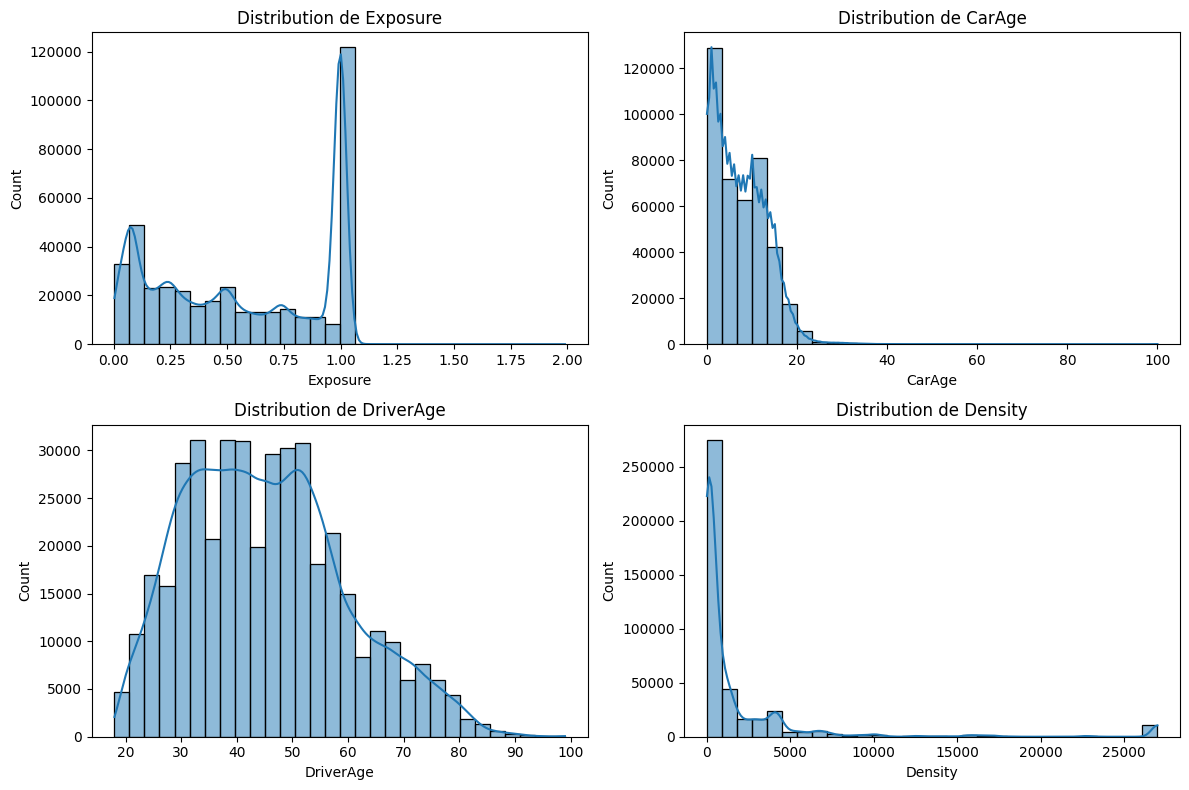


Variables numériques après normalisation/standardisation :
   Exposure    CarAge  DriverAge   Density
0 -1.275013 -1.307028   0.047468 -0.399718
1  0.754883 -1.307028   0.047468 -0.399718
2 -0.111206 -0.959986  -0.510875  0.213106
3 -0.300663 -0.959986  -0.510875  0.213106
4 -1.112621 -1.307028  -0.301497 -0.403068

Dataset après One-Hot Encoding :
   PolicyID  ClaimNb  Exposure    CarAge  DriverAge   Density  Power_e  \
0         1        0 -1.275013 -1.307028   0.047468 -0.399718    False   
1         2        0  0.754883 -1.307028   0.047468 -0.399718    False   
2         3        0 -0.111206 -0.959986  -0.510875  0.213106    False   
3         4        0 -0.300663 -0.959986  -0.510875  0.213106    False   
4         5        0 -1.112621 -1.307028  -0.301497 -0.403068    False   

   Power_f  Power_g  Power_h  ...  Gas_Regular  Region_Basse-Normandie  \
0    False     True    False  ...        False                   False   
1    False     True    False  ...        False         

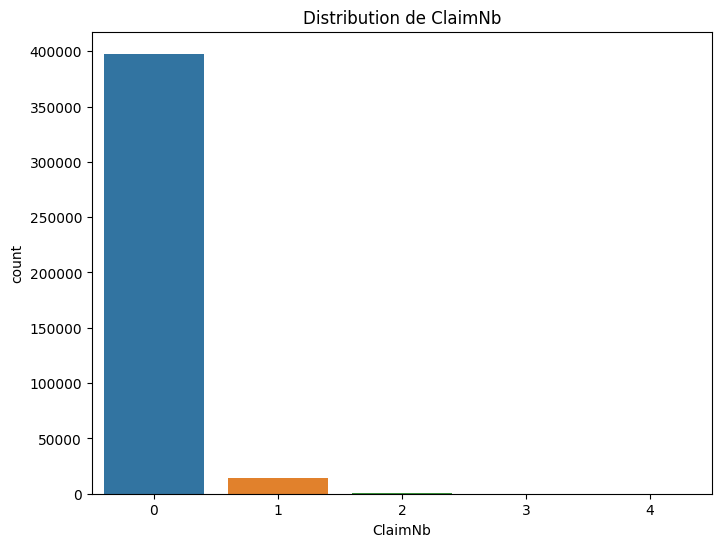


Données après SMOTE :
ClaimNb
0    397779
1    397779
2    397779
Name: count, dtype: int64

Outliers dans Exposure : 0
Outliers dans CarAge : 1889
Outliers dans DriverAge : 1441
Outliers dans Density : 63767


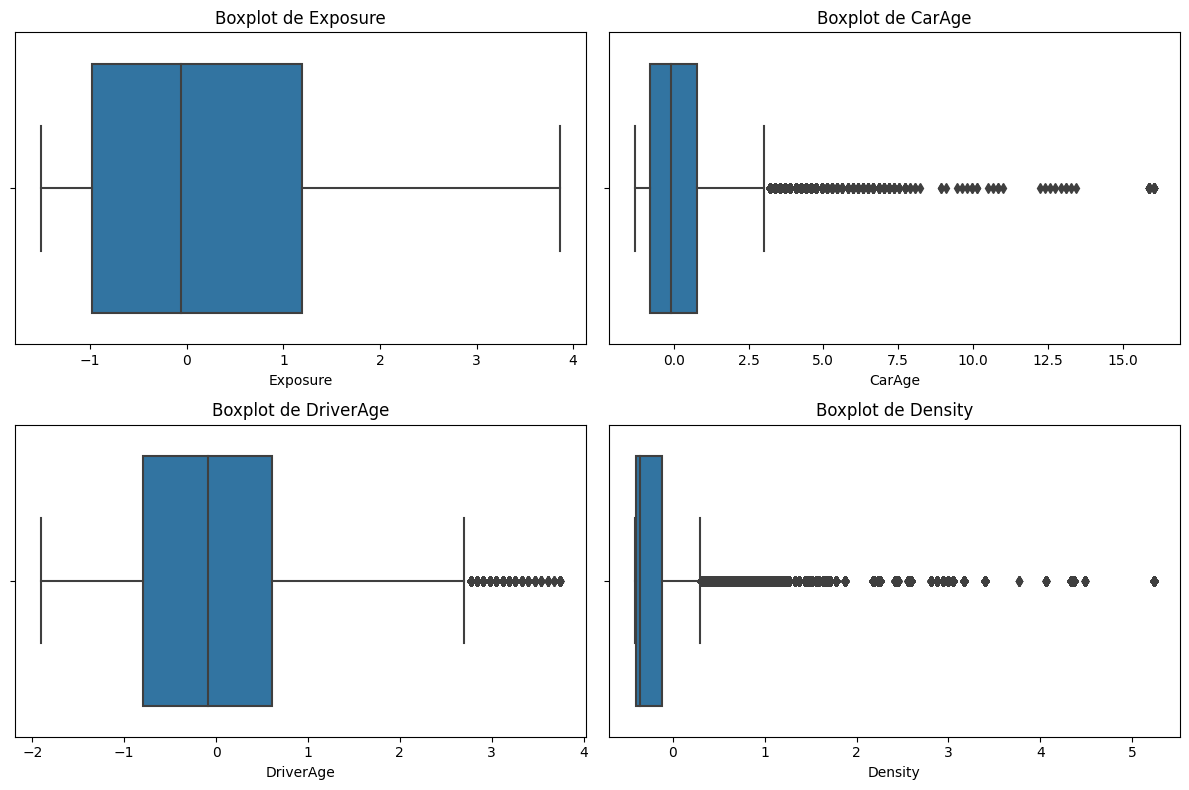


Taille des ensembles d'entraînement et de test :
X_train : (954669, 31)
X_test : (238668, 31)
y_train : (954669,)
y_test : (238668,)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split

# Charger les données
df = pd.read_csv('/kaggle/input/assurance/freMTPLfreqOG.csv')

# Afficher les premières lignes
print("Premières lignes du dataset :")
print(df.head())

# Statistiques descriptives pour les variables numériques
print("\nStatistiques descriptives pour les variables numériques :")
print(df[['Exposure', 'CarAge', 'DriverAge', 'Density']].describe())

# Visualisation des distributions des variables numériques
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['Exposure'], bins=30, kde=True)
plt.title('Distribution de Exposure')

plt.subplot(2, 2, 2)
sns.histplot(df['CarAge'], bins=30, kde=True)
plt.title('Distribution de CarAge')

plt.subplot(2, 2, 3)
sns.histplot(df['DriverAge'], bins=30, kde=True)
plt.title('Distribution de DriverAge')

plt.subplot(2, 2, 4)
sns.histplot(df['Density'], bins=30, kde=True)
plt.title('Distribution de Density')

plt.tight_layout()
plt.show()

# Normalisation/Standardisation des variables numériques
scaler = StandardScaler()  # ou MinMaxScaler()
df[['Exposure', 'CarAge', 'DriverAge', 'Density']] = scaler.fit_transform(df[['Exposure', 'CarAge', 'DriverAge', 'Density']])

print("\nVariables numériques après normalisation/standardisation :")
print(df[['Exposure', 'CarAge', 'DriverAge', 'Density']].head())

# Encodage des variables catégorielles
# One-Hot Encoding pour les variables catégorielles sans ordre naturel
df = pd.get_dummies(df, columns=['Power', 'Brand', 'Gas', 'Region'], drop_first=True)

print("\nDataset après One-Hot Encoding :")
print(df.head())

# Analyse de la variable cible (ClaimNb)
print("\nDistribution de la variable cible (ClaimNb) :")
print(df['ClaimNb'].value_counts())

# Visualisation de la distribution de ClaimNb
plt.figure(figsize=(8, 6))
sns.countplot(x='ClaimNb', data=df)
plt.title('Distribution de ClaimNb')
plt.show()

# Gestion des données déséquilibrées
# Regrouper les classes minoritaires (ClaimNb >= 2) en une seule classe
df['ClaimNb'] = df['ClaimNb'].apply(lambda x: 2 if x >= 2 else x)

# Séparer les features (X) et la target (y)
X = df.drop(columns=['ClaimNb', 'PolicyID'])
y = df['ClaimNb']

# Appliquer SMOTE seulement si la classe minoritaire a suffisamment d'échantillons
if df['ClaimNb'].value_counts().iloc[1] >= 5:  # Au moins 5 échantillons dans la classe minoritaire
    smote = SMOTE(random_state=42, k_neighbors=5)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    print("\nDonnées après SMOTE :")
    print(pd.Series(y_resampled).value_counts())
else:
    # Utiliser Random Oversampling si SMOTE ne peut pas être appliqué
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    print("\nDonnées après Random Oversampling :")
    print(pd.Series(y_resampled).value_counts())

# Détection des outliers avec l'IQR (Interquartile Range)
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Détection des outliers pour les variables numériques
outliers_exposure = detect_outliers(df['Exposure'])
outliers_car_age = detect_outliers(df['CarAge'])
outliers_driver_age = detect_outliers(df['DriverAge'])
outliers_density = detect_outliers(df['Density'])

print("\nOutliers dans Exposure :", len(outliers_exposure))
print("Outliers dans CarAge :", len(outliers_car_age))
print("Outliers dans DriverAge :", len(outliers_driver_age))
print("Outliers dans Density :", len(outliers_density))

# Visualisation des outliers avec des boxplots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x=df['Exposure'])
plt.title('Boxplot de Exposure')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['CarAge'])
plt.title('Boxplot de CarAge')

plt.subplot(2, 2, 3)
sns.boxplot(x=df['DriverAge'])
plt.title('Boxplot de DriverAge')

plt.subplot(2, 2, 4)
sns.boxplot(x=df['Density'])
plt.title('Boxplot de Density')

plt.tight_layout()
plt.show()

# Gestion des outliers (optionnel)
# Remplacer les outliers par les valeurs limites
df['Exposure'] = np.where(df['Exposure'] > df['Exposure'].quantile(0.99), df['Exposure'].quantile(0.99), df['Exposure'])
df['Exposure'] = np.where(df['Exposure'] < df['Exposure'].quantile(0.01), df['Exposure'].quantile(0.01), df['Exposure'])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("\nTaille des ensembles d'entraînement et de test :")
print("X_train :", X_train.shape)
print("X_test :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

***
***
***

In [3]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# 1. Entraînement du modèle XGBoost
# Convertir les données en DMatrix (format optimisé pour XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Définir les paramètres de base pour XGBoost
params = {
    'objective': 'multi:softprob',  # Pour un problème de classification multi-classes
    'num_class': 3,  # Nombre de classes (ClaimNb = 0, 1, 2)
    'eval_metric': 'mlogloss',  # Métrique d'évaluation
    'max_depth': 6,  # Profondeur maximale des arbres
    'eta': 0.1,  # Taux d'apprentissage
    'subsample': 0.8,  # Fraction des échantillons utilisés pour chaque arbre
    'colsample_bytree': 0.8,  # Fraction des features utilisées pour chaque arbre
    'seed': 42  # Graine aléatoire pour la reproductibilité
}

# Entraîner le modèle
num_rounds = 100  # Nombre d'itérations (arbres)
model = xgb.train(params, dtrain, num_rounds)

# 2. Prédiction sur l'ensemble de test
y_pred_prob = model.predict(dtest)  # Probabilités pour chaque classe
y_pred = np.argmax(y_pred_prob, axis=1)  # Convertir les probabilités en classes prédites

# 3. Évaluation des performances
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

# F1-score (moyenne pondérée)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score (weighted) : {f1:.4f}")

# AUC-ROC (pour chaque classe)
for i in range(3):  # Pour chaque classe (0, 1, 2)
    auc = roc_auc_score((y_test == i).astype(int), y_pred_prob[:, i])
    print(f"AUC-ROC pour la classe {i} : {auc:.4f}")

# 4. Optimisation des hyperparamètres avec Grid Search
# Définir les hyperparamètres à optimiser
param_grid = {
    'max_depth': [4, 6, 8],
    'eta': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Créer un modèle XGBoost pour Grid Search
xgb_model = xgb.XGBClassifier(objective='multi:softprob', num_class=3, eval_metric='mlogloss', seed=42)

# Appliquer Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1_weighted', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)


# Afficher les meilleurs hyperparamètres
print("\nMeilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)

# Entraîner le modèle avec les meilleurs hyperparamètres
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Prédiction avec le meilleur modèle
y_pred_best = best_model.predict(X_test)

# Évaluation des performances avec le meilleur modèle
print("\nRapport de classification (meilleur modèle) :")
print(classification_report(y_test, y_pred_best))

print("Matrice de confusion (meilleur modèle) :")
print(confusion_matrix(y_test, y_pred_best))

f1_best = f1_score(y_test, y_pred_best, average='weighted')
print(f"F1-score (weighted) avec le meilleur modèle : {f1_best:.4f}")

Rapport de classification :
              precision    recall  f1-score   support

           0       0.78      0.92      0.84     79602
           1       0.73      0.63      0.68     79631
           2       0.79      0.75      0.77     79435

    accuracy                           0.77    238668
   macro avg       0.77      0.77      0.77    238668
weighted avg       0.77      0.77      0.77    238668

Matrice de confusion :
[[73429  2910  3263]
 [16768 50557 12306]
 [ 4269 15455 59711]]
F1-score (weighted) : 0.7654
AUC-ROC pour la classe 0 : 0.9530
AUC-ROC pour la classe 1 : 0.8584
AUC-ROC pour la classe 2 : 0.9269

Meilleurs hyperparamètres trouvés :
{'colsample_bytree': 1.0, 'eta': 0.2, 'max_depth': 8, 'subsample': 0.6}

Rapport de classification (meilleur modèle) :
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     79602
           1       0.91      0.78      0.84     79631
           2       0.91      0.91      0.91     79435


In [5]:

# Sauvegarder le modèle entraîné avec GridSearchCV
best_model.save_model("best_xgb_model.json")


In [6]:
import joblib

# Sauvegarde
joblib.dump(best_model, "best_xgb_model.pkl")

# Chargement du modèle
loaded_model = joblib.load("best_xgb_model.pkl")


In [1]:
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Visualiser l'importance des features
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Visualiser l'impact des features sur une prédiction individuelle
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])

NameError: name 'best_model' is not defined